# Importing The Libraries #

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data Preprocessing 

In [2]:
dataset = '../Data/Processed/2023/data_2023.csv'

df = pd.read_csv(dataset)
df

,date,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,2023-01-01,4530,2543.02,16.10,1.5,176,Walking,Clear,Tired
1,2023-01-01,11613,1720.76,8.10,6.3,128,Cycling,Fog,Happy
2,2023-01-01,27335,1706.35,3.57,6.7,134,Yoga,Snow,Neutral
3,2023-01-01,13459,2912.38,6.41,11.6,116,Swimming,Rain,Tired
4,2023-01-01,15378,3344.51,17.88,7.4,84,Swimming,Rain,Neutral
...,...,...,...,...,...,...,...,...,...
312842,2023-12-31,20430,2258.27,2.57,4.2,157,Walking,Rain,Neutral
312843,2023-12-31,3088,1840.61,14.21,2.9,149,Gym Workout,Snow,Tired
312844,2023-12-31,5061,1816.55,1.36,0.2,165,Running,Snow,Neutral
312845,2023-12-31,14751,2465.31,17.93,5.4,116,Running,Snow,Stressed


***Splitting The Dataset Based On Workout Type***

In [3]:
# Get unique workout types
unique_workout_types = df['workout_type'].unique()

# Loop through each unique workout type and create a DataFrame
for workout_type in unique_workout_types:
    # Create a valid variable name (replace spaces with underscores)
    variable_name = f"{workout_type.replace(' ', '_')}_df"
    
    # Create the DataFrame using exec
    exec(f"{variable_name} = df[df['workout_type'] == '{workout_type}'].reset_index(drop=True)")
    
    # Print the DataFrame using exec
    exec(f"print('{variable_name}')")  # Print the variable name


Walking_df
Cycling_df
Yoga_df
Swimming_df
Gym_Workout_df
Running_df


***Grouping Into Month Wise***

**Walking**

In [4]:
Walking_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,52306.000000,52306.000000,52306.000000,52306.000000,52306.000000
mean,15049.536497,2747.763233,9.974800,5.995698,119.307728
std,8688.395855,721.209700,5.778439,3.455085,34.743084
min,0.000000,1500.030000,0.000000,0.000000,60.000000
25%,7468.250000,2123.337500,4.960000,3.000000,89.000000
50%,15100.000000,2744.560000,10.010000,6.000000,119.000000
75%,22597.750000,3370.827500,14.960000,9.000000,150.000000
max,29999.000000,4000.000000,20.000000,12.000000,179.000000


In [5]:
Walking_df['date'] = pd.to_datetime(Walking_df['date'])
Walking_df['month_name'] = Walking_df['date'].dt.strftime('%B')
Walking_df = Walking_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Walking_df.columns if col != 'month_name']
Walking_df = Walking_df[columns_order]
Walking_df = Walking_df.rename(columns={'month_name' : 'month'})
Walking_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,4530,2543.02,16.10,1.5,176,Walking,Clear,Tired
1,January,22850,3831.47,19.15,0.3,141,Walking,Clear,Neutral
2,January,19439,3455.02,10.39,9.3,65,Walking,Clear,Happy
3,January,14417,3910.01,10.24,10.8,139,Walking,Snow,Stressed
4,January,13549,1948.82,18.03,7.0,68,Walking,Clear,Neutral
...,...,...,...,...,...,...,...,...,...
52301,December,12518,3598.21,0.57,8.0,114,Walking,Snow,Neutral
52302,December,14720,2041.46,14.56,8.7,91,Walking,Rain,Stressed
52303,December,13777,3246.63,8.50,8.1,78,Walking,Fog,Tired
52304,December,20430,2258.27,2.57,4.2,157,Walking,Rain,Neutral


In [6]:
grouped_walking_df = Walking_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_walking_df = grouped_walking_df.reset_index()
grouped_walking_df


,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15183.737952,2748.946033,9.882264,6.065802,118.089435,Fog,Stressed
1,August,14913.408958,2756.055334,10.011828,5.999482,119.303849,Snow,Happy
2,December,15156.509624,2749.775431,10.003721,5.943148,119.472731,Snow,Neutral
3,February,15009.736829,2742.048672,9.907043,6.016360,119.780439,Rain,Stressed
4,January,14996.810847,2741.668822,10.019122,5.957391,119.673928,Rain,Tired
5,July,14972.668112,2753.959370,9.979943,6.024378,119.316594,Rain,Tired
6,June,14946.176511,2743.093489,9.958506,6.076718,118.438750,Fog,Tired
7,March,15194.158507,2741.614460,9.969785,5.933982,118.880170,Snow,Stressed
8,May,15016.180856,2744.457327,9.918509,6.012995,119.780856,Snow,Tired
9,November,14788.785253,2733.810850,9.945207,5.972811,119.823733,Snow,Happy


In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_walking_df['month'] = pd.Categorical(grouped_walking_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_walking_df = grouped_walking_df.sort_values(by='month')

# Reset index if needed
grouped_walking_df = grouped_walking_df.reset_index(drop=True)
grouped_walking_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,14996.810847,2741.668822,10.019122,5.957391,119.673928,Rain,Tired
1,February,15009.736829,2742.048672,9.907043,6.016360,119.780439,Rain,Stressed
2,March,15194.158507,2741.614460,9.969785,5.933982,118.880170,Snow,Stressed
3,April,15183.737952,2748.946033,9.882264,6.065802,118.089435,Fog,Stressed
4,May,15016.180856,2744.457327,9.918509,6.012995,119.780856,Snow,Tired
5,June,14946.176511,2743.093489,9.958506,6.076718,118.438750,Fog,Tired
6,July,14972.668112,2753.959370,9.979943,6.024378,119.316594,Rain,Tired
7,August,14913.408958,2756.055334,10.011828,5.999482,119.303849,Snow,Happy
8,September,15266.784067,2753.081891,9.930729,5.955742,120.035406,Clear,Tired
9,October,15148.786213,2764.081153,10.158720,5.993963,119.132688,Fog,Stressed


**Cycling** 

In [8]:
Cycling_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,52507.000000,52507.000000,52507.000000,52507.000000,52507.000000
mean,15001.521321,2747.907366,9.983708,6.002843,119.388424
std,8628.693412,721.370257,5.781937,3.469583,34.682829
min,0.000000,1500.010000,0.000000,0.000000,60.000000
25%,7516.000000,2126.065000,4.970000,3.000000,89.000000
50%,15025.000000,2746.690000,10.030000,6.000000,119.000000
75%,22455.000000,3372.995000,14.990000,9.000000,149.000000
max,29999.000000,4000.000000,20.000000,12.000000,179.000000


In [9]:
Cycling_df['date'] = pd.to_datetime(Cycling_df['date'])
Cycling_df['month_name'] = Cycling_df['date'].dt.strftime('%B')
Cycling_df = Cycling_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Cycling_df.columns if col != 'month_name']
Cycling_df = Cycling_df[columns_order]
Cycling_df = Cycling_df.rename(columns={'month_name' : 'month'})
Cycling_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,11613,1720.76,8.10,6.3,128,Cycling,Fog,Happy
1,January,27460,1547.16,2.21,4.6,87,Cycling,Rain,Happy
2,January,11282,2750.65,10.97,0.5,167,Cycling,Snow,Stressed
3,January,23910,2025.84,19.18,0.1,131,Cycling,Fog,Tired
4,January,5632,3282.66,12.15,4.8,63,Cycling,Snow,Neutral
...,...,...,...,...,...,...,...,...,...
52502,December,4672,2603.44,0.09,11.3,81,Cycling,Fog,Neutral
52503,December,5081,3036.80,17.28,4.7,110,Cycling,Rain,Tired
52504,December,7582,2539.41,18.99,3.2,142,Cycling,Clear,Neutral
52505,December,11763,2432.03,12.89,5.7,173,Cycling,Fog,Tired


In [10]:
grouped_cycling_df = Cycling_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_cycling_df = grouped_cycling_df.reset_index()
grouped_cycling_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15187.878631,2744.471317,9.800612,5.985679,120.264355,Clear,Happy
1,August,15085.080546,2736.916430,9.908296,6.051991,119.832082,Snow,Happy
2,December,15079.256138,2746.465996,9.960117,5.932736,119.384649,Fog,Happy
3,February,14947.219975,2743.047021,9.907699,5.973958,119.416769,Snow,Happy
4,January,14904.854697,2748.527177,10.041608,5.999707,120.144627,Rain,Neutral
5,July,15139.709255,2732.375761,9.874309,5.952077,118.602257,Fog,Stressed
6,June,14794.502550,2757.713971,9.966572,5.967524,118.838665,Snow,Tired
7,March,14987.375984,2748.793249,10.064958,6.054171,119.134248,Snow,Neutral
8,May,15032.113662,2748.001755,10.040577,6.050716,118.742441,Clear,Happy
9,November,15111.590930,2764.602712,10.161953,6.070651,120.205814,Clear,Stressed


In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_cycling_df['month'] = pd.Categorical(grouped_cycling_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_cycling_df = grouped_cycling_df.sort_values(by='month')

# Reset index if needed
grouped_cycling_df = grouped_cycling_df.reset_index(drop=True)
grouped_cycling_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,14904.854697,2748.527177,10.041608,5.999707,120.144627,Rain,Neutral
1,February,14947.219975,2743.047021,9.907699,5.973958,119.416769,Snow,Happy
2,March,14987.375984,2748.793249,10.064958,6.054171,119.134248,Snow,Neutral
3,April,15187.878631,2744.471317,9.800612,5.985679,120.264355,Clear,Happy
4,May,15032.113662,2748.001755,10.040577,6.050716,118.742441,Clear,Happy
5,June,14794.502550,2757.713971,9.966572,5.967524,118.838665,Snow,Tired
6,July,15139.709255,2732.375761,9.874309,5.952077,118.602257,Fog,Stressed
7,August,15085.080546,2736.916430,9.908296,6.051991,119.832082,Snow,Happy
8,September,15008.535205,2752.048392,10.035497,6.041026,118.698803,Rain,Stressed
9,October,14731.940724,2752.295629,10.042066,5.955136,119.391629,Snow,Neutral


**Yoga**

In [12]:
Yoga_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000
mean,15043.265413,2754.759440,9.973154,6.001880,119.294736
std,8633.858038,721.847171,5.751206,3.465123,34.599429
min,2.000000,1500.000000,0.000000,0.000000,60.000000
25%,7525.750000,2131.440000,5.010000,3.000000,89.000000
50%,15078.000000,2754.405000,9.950000,6.000000,119.000000
75%,22517.500000,3375.947500,14.900000,9.000000,149.000000
max,29999.000000,3999.900000,20.000000,12.000000,179.000000


In [13]:
Yoga_df['date'] = pd.to_datetime(Yoga_df['date'])
Yoga_df['month_name'] = Yoga_df['date'].dt.strftime('%B')
Yoga_df = Yoga_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Yoga_df.columns if col != 'month_name']
Yoga_df = Yoga_df[columns_order]
Yoga_df = Yoga_df.rename(columns={'month_name' : 'month'})
Yoga_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,27335,1706.35,3.57,6.7,134,Yoga,Snow,Neutral
1,January,19076,3462.39,5.77,2.2,100,Yoga,Snow,Stressed
2,January,18165,3984.15,8.21,9.8,84,Yoga,Fog,Neutral
3,January,28144,2799.90,11.05,5.7,175,Yoga,Rain,Tired
4,January,2417,1804.38,10.50,5.7,137,Yoga,Snow,Tired
...,...,...,...,...,...,...,...,...,...
51899,December,3165,3761.85,11.63,8.6,156,Yoga,Rain,Tired
51900,December,12070,1884.65,2.17,7.8,152,Yoga,Clear,Happy
51901,December,15268,2410.36,11.38,8.9,160,Yoga,Rain,Happy
51902,December,26238,2206.49,12.41,2.2,72,Yoga,Fog,Tired


In [14]:
grouped_yoga_df = Yoga_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_yoga_df = grouped_yoga_df.reset_index()
grouped_yoga_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15006.524681,2757.872375,9.825435,5.992399,119.844264,Snow,Tired
1,August,15173.304034,2736.403288,9.825204,5.974104,119.598603,Clear,Happy
2,December,14835.257963,2736.231988,10.042290,6.001604,119.460357,Clear,Tired
3,February,15139.736722,2758.431893,9.965273,6.029733,119.091995,Fog,Happy
4,January,15224.894737,2765.107669,9.913117,5.964593,119.406243,Snow,Neutral
5,July,14892.485520,2760.431851,9.986609,5.988733,119.446606,Fog,Happy
6,June,14993.153900,2742.087042,9.853059,5.986994,118.711178,Rain,Happy
7,March,15048.047587,2743.720932,10.116970,6.060045,119.588777,Fog,Stressed
8,May,14926.404274,2758.653114,9.970592,5.993813,119.452868,Rain,Stressed
9,November,15179.230842,2771.433160,10.070224,6.006649,118.161283,Rain,Stressed


In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_yoga_df['month'] = pd.Categorical(grouped_yoga_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_yoga_df = grouped_yoga_df.sort_values(by='month')

# Reset index if needed
grouped_yoga_df = grouped_yoga_df.reset_index(drop=True)
grouped_yoga_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,15224.894737,2765.107669,9.913117,5.964593,119.406243,Snow,Neutral
1,February,15139.736722,2758.431893,9.965273,6.029733,119.091995,Fog,Happy
2,March,15048.047587,2743.720932,10.116970,6.060045,119.588777,Fog,Stressed
3,April,15006.524681,2757.872375,9.825435,5.992399,119.844264,Snow,Tired
4,May,14926.404274,2758.653114,9.970592,5.993813,119.452868,Rain,Stressed
5,June,14993.153900,2742.087042,9.853059,5.986994,118.711178,Rain,Happy
6,July,14892.485520,2760.431851,9.986609,5.988733,119.446606,Fog,Happy
7,August,15173.304034,2736.403288,9.825204,5.974104,119.598603,Clear,Happy
8,September,15163.507887,2768.037832,10.056169,6.047538,119.868547,Clear,Happy
9,October,14957.225375,2760.630254,10.054683,5.980507,118.856286,Rain,Happy


**Swimming**

In [16]:
Swimming_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000
mean,15035.824260,2752.167785,9.994926,5.992542,119.617919
std,8658.327623,721.501020,5.764872,3.453902,34.591287
min,0.000000,1500.000000,0.000000,0.000000,60.000000
25%,7600.000000,2125.900000,4.980000,3.000000,90.000000
50%,15084.000000,2746.900000,10.020000,6.000000,120.000000
75%,22536.000000,3376.540000,14.960000,9.000000,150.000000
max,29999.000000,3999.910000,20.000000,12.000000,179.000000


In [17]:
Swimming_df['date'] = pd.to_datetime(Swimming_df['date'])
Swimming_df['month_name'] = Swimming_df['date'].dt.strftime('%B')
Swimming_df = Swimming_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Swimming_df.columns if col != 'month_name']
Swimming_df = Swimming_df[columns_order]
Swimming_df = Swimming_df.rename(columns={'month_name' : 'month'})
Swimming_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,13459,2912.38,6.41,11.6,116,Swimming,Rain,Tired
1,January,15378,3344.51,17.88,7.4,84,Swimming,Rain,Neutral
2,January,498,3553.37,3.31,7.4,154,Swimming,Snow,Stressed
3,January,11162,3363.78,13.27,10.2,128,Swimming,Fog,Happy
4,January,20127,3664.69,9.93,7.2,76,Swimming,Clear,Happy
...,...,...,...,...,...,...,...,...,...
51628,December,6123,3706.26,13.47,2.8,81,Swimming,Fog,Stressed
51629,December,20472,2715.57,12.31,8.1,150,Swimming,Fog,Happy
51630,December,15081,2327.66,0.13,5.3,80,Swimming,Rain,Tired
51631,December,16924,2583.81,3.31,3.5,81,Swimming,Rain,Neutral


In [18]:
grouped_swimming_df = Swimming_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_swimming_df = grouped_swimming_df.reset_index()
grouped_swimming_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15061.904547,2753.460652,9.954204,5.935563,120.077839,Clear,Tired
1,August,14941.665922,2751.448345,9.974089,6.058553,120.234926,Fog,Tired
2,December,14995.756030,2749.109385,9.905499,5.883140,119.676716,Snow,Happy
3,February,15175.695363,2744.239837,10.037343,5.928959,118.563888,Clear,Happy
4,January,14979.511188,2748.061322,10.165276,6.046390,120.744867,Rain,Happy
5,July,15129.212073,2753.264900,9.953707,5.993619,119.178793,Rain,Happy
6,June,14874.027316,2769.301537,10.101565,6.005321,119.062708,Clear,Happy
7,March,15048.449299,2755.171324,9.929253,6.021775,119.882042,Rain,Neutral
8,May,14975.043193,2747.443711,9.868037,5.987856,120.050882,Snow,Neutral
9,November,14919.796893,2746.067282,10.077924,6.046670,118.946105,Snow,Neutral


In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_swimming_df['month'] = pd.Categorical(grouped_swimming_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_swimming_df = grouped_swimming_df.sort_values(by='month')

# Reset index if needed
grouped_swimming_df = grouped_swimming_df.reset_index(drop=True)
grouped_swimming_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,14979.511188,2748.061322,10.165276,6.046390,120.744867,Rain,Happy
1,February,15175.695363,2744.239837,10.037343,5.928959,118.563888,Clear,Happy
2,March,15048.449299,2755.171324,9.929253,6.021775,119.882042,Rain,Neutral
3,April,15061.904547,2753.460652,9.954204,5.935563,120.077839,Clear,Tired
4,May,14975.043193,2747.443711,9.868037,5.987856,120.050882,Snow,Neutral
5,June,14874.027316,2769.301537,10.101565,6.005321,119.062708,Clear,Happy
6,July,15129.212073,2753.264900,9.953707,5.993619,119.178793,Rain,Happy
7,August,14941.665922,2751.448345,9.974089,6.058553,120.234926,Fog,Tired
8,September,14964.604635,2760.896149,9.922477,6.003488,120.224719,Rain,Neutral
9,October,15365.210742,2747.722462,10.057233,5.992126,118.682294,Fog,Stressed


**Gym_Workout**

In [20]:
Gym_Workout_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,52222.000000,52222.000000,52222.000000,52222.000000,52222.000000
mean,14999.577419,2743.830380,10.000690,5.994472,119.594864
std,8670.730220,721.812516,5.781733,3.458164,34.625982
min,1.000000,1500.010000,0.000000,0.000000,60.000000
25%,7457.250000,2122.787500,5.000000,3.000000,90.000000
50%,15035.000000,2736.955000,10.030000,6.000000,120.000000
75%,22486.000000,3369.732500,15.000000,9.000000,150.000000
max,29999.000000,3999.930000,20.000000,12.000000,179.000000


In [21]:
Gym_Workout_df['date'] = pd.to_datetime(Gym_Workout_df['date'])
Gym_Workout_df['month_name'] = Gym_Workout_df['date'].dt.strftime('%B')
Gym_Workout_df = Gym_Workout_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Gym_Workout_df.columns if col != 'month_name']
Gym_Workout_df = Gym_Workout_df[columns_order]
Gym_Workout_df = Gym_Workout_df.rename(columns={'month_name' : 'month'})
Gym_Workout_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,29800,1812.50,16.92,7.0,120,Gym Workout,Snow,Stressed
1,January,9081,3679.95,6.98,4.2,152,Gym Workout,Fog,Stressed
2,January,13343,3484.76,13.96,10.3,96,Gym Workout,Snow,Stressed
3,January,2992,2759.26,13.68,8.1,176,Gym Workout,Clear,Neutral
4,January,26423,2600.71,6.51,0.9,160,Gym Workout,Fog,Tired
...,...,...,...,...,...,...,...,...,...
52217,December,4193,3613.19,4.31,0.5,87,Gym Workout,Rain,Happy
52218,December,6848,3177.32,17.11,0.6,136,Gym Workout,Clear,Neutral
52219,December,14978,3219.92,11.30,3.1,176,Gym Workout,Fog,Neutral
52220,December,7227,3190.56,10.11,7.1,176,Gym Workout,Rain,Tired


In [22]:
grouped_gym_workout_df = Gym_Workout_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_gym_workout_df = grouped_gym_workout_df.reset_index()
grouped_gym_workout_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15187.593938,2752.078785,9.990361,5.982054,119.852538,Clear,Neutral
1,August,15008.373923,2738.280045,10.065805,6.012245,120.081633,Clear,Tired
2,December,14889.663408,2750.046692,10.004806,6.006110,118.510775,Clear,Happy
3,February,14907.864646,2748.892417,10.003856,5.997955,119.998232,Clear,Stressed
4,January,14929.620659,2750.746771,9.969866,6.040757,119.381358,Fog,Neutral
5,July,15030.619216,2751.373257,10.106801,5.914899,119.445207,Rain,Stressed
6,June,14859.970207,2727.607943,9.918433,5.995002,120.148246,Clear,Neutral
7,March,15095.873646,2743.001546,9.932153,5.949932,119.780686,Clear,Happy
8,May,14981.707037,2717.302023,9.934119,6.003199,120.176925,Fog,Tired
9,November,14916.290606,2741.664468,10.012561,6.039311,119.715641,Snow,Neutral


In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_gym_workout_df['month'] = pd.Categorical(grouped_gym_workout_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_gym_workout_df = grouped_gym_workout_df.sort_values(by='month')

# Reset index if needed
grouped_gym_workout_df = grouped_gym_workout_df.reset_index(drop=True)
grouped_gym_workout_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,14929.620659,2750.746771,9.969866,6.040757,119.381358,Fog,Neutral
1,February,14907.864646,2748.892417,10.003856,5.997955,119.998232,Clear,Stressed
2,March,15095.873646,2743.001546,9.932153,5.949932,119.780686,Clear,Happy
3,April,15187.593938,2752.078785,9.990361,5.982054,119.852538,Clear,Neutral
4,May,14981.707037,2717.302023,9.934119,6.003199,120.176925,Fog,Tired
5,June,14859.970207,2727.607943,9.918433,5.995002,120.148246,Clear,Neutral
6,July,15030.619216,2751.373257,10.106801,5.914899,119.445207,Rain,Stressed
7,August,15008.373923,2738.280045,10.065805,6.012245,120.081633,Clear,Tired
8,September,15053.553580,2760.162655,10.089393,5.932385,119.117117,Fog,Happy
9,October,15126.494172,2745.840453,9.979888,6.056851,119.027711,Clear,Happy


**Running**

In [24]:
Running_df.describe()


,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg
count,52275.000000,52275.000000,52275.000000,52275.000000,52275.000000
mean,15031.114089,2750.214196,9.969604,6.004679,119.291994
std,8642.800069,722.771430,5.783005,3.482155,34.626119
min,0.000000,1500.050000,0.000000,0.000000,60.000000
25%,7538.500000,2125.090000,4.940000,3.000000,89.000000
50%,15044.000000,2744.580000,9.970000,6.000000,119.000000
75%,22513.000000,3377.780000,14.980000,9.000000,149.000000
max,29999.000000,3999.990000,20.000000,12.000000,179.000000


In [25]:
Running_df['date'] = pd.to_datetime(Running_df['date'])
Running_df['month_name'] = Running_df['date'].dt.strftime('%B')
Running_df = Running_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Running_df.columns if col != 'month_name']
Running_df = Running_df[columns_order]
Running_df = Running_df.rename(columns={'month_name' : 'month'})
Running_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,workout_type,weather_conditions,mood
0,January,9724,3082.07,1.16,6.1,86,Running,Snow,Tired
1,January,18735,3982.39,3.48,8.1,132,Running,Rain,Stressed
2,January,24993,1511.86,18.73,3.9,105,Running,Fog,Stressed
3,January,2821,2157.13,10.01,7.4,144,Running,Clear,Tired
4,January,22274,1951.05,1.11,0.6,121,Running,Snow,Neutral
...,...,...,...,...,...,...,...,...,...
52270,December,11390,3417.21,17.78,6.7,177,Running,Rain,Neutral
52271,December,24323,2161.66,19.69,4.2,102,Running,Snow,Happy
52272,December,3089,2707.34,16.02,9.5,120,Running,Fog,Tired
52273,December,5061,1816.55,1.36,0.2,165,Running,Snow,Neutral


In [26]:
grouped_running_df = Running_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_running_df = grouped_running_df.reset_index()
grouped_running_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,April,15055.981208,2756.976960,9.992923,5.971908,119.403901,Clear,Stressed
1,August,14994.801980,2760.642739,9.875188,6.019956,120.205281,Snow,Happy
2,December,15100.062092,2750.267696,10.043170,6.072913,119.349831,Fog,Neutral
3,February,15217.769474,2768.202006,9.981675,5.964216,120.158958,Clear,Neutral
4,January,15156.281655,2751.376893,9.940953,5.981119,118.693289,Clear,Tired
5,July,14890.791406,2762.146417,9.828353,5.947135,119.210833,Snow,Stressed
6,June,14755.138172,2749.599686,10.089863,6.076855,119.529658,Fog,Neutral
7,March,15175.809600,2741.604587,9.953431,6.037827,118.838080,Clear,Tired
8,May,14998.947673,2714.549132,10.014503,5.970919,119.233850,Snow,Tired
9,November,14928.221622,2734.969657,9.977584,5.998402,118.960517,Fog,Neutral


In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_running_df['month'] = pd.Categorical(grouped_running_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_running_df = grouped_running_df.sort_values(by='month')

# Reset index if needed
grouped_running_df = grouped_running_df.reset_index(drop=True)
grouped_running_df

,month,steps,calories_burned,distance_km,sleep_hours,heart_rate_avg,weather_conditions,mood
0,January,15156.281655,2751.376893,9.940953,5.981119,118.693289,Clear,Tired
1,February,15217.769474,2768.202006,9.981675,5.964216,120.158958,Clear,Neutral
2,March,15175.809600,2741.604587,9.953431,6.037827,118.838080,Clear,Tired
3,April,15055.981208,2756.976960,9.992923,5.971908,119.403901,Clear,Stressed
4,May,14998.947673,2714.549132,10.014503,5.970919,119.233850,Snow,Tired
5,June,14755.138172,2749.599686,10.089863,6.076855,119.529658,Fog,Neutral
6,July,14890.791406,2762.146417,9.828353,5.947135,119.210833,Snow,Stressed
7,August,14994.801980,2760.642739,9.875188,6.019956,120.205281,Snow,Happy
8,September,15070.531742,2749.159048,9.924136,5.996131,119.553290,Snow,Stressed
9,October,15035.060997,2762.483660,10.022019,6.015472,118.420971,Rain,Happy


# Data Visualisation

## Workout Type Analysis

In [28]:
workout_summary = df.groupby('workout_type').agg({
    'steps': 'sum',
    'calories_burned': 'sum',
    'distance_km': 'sum'
}).reset_index()


***Total Steps By Workout Type***

Text(0, 0.5, 'Total Steps')

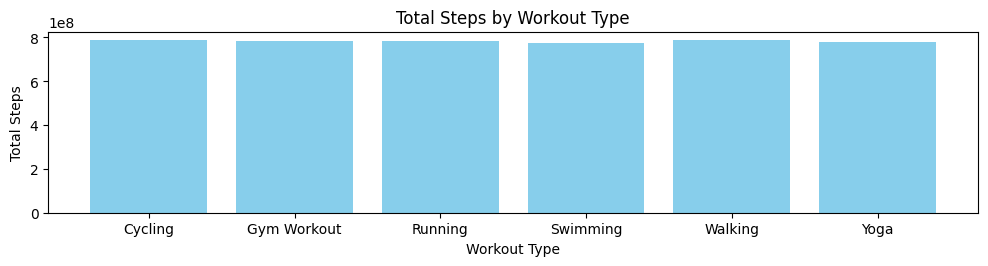

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.bar(workout_summary['workout_type'], workout_summary['steps'], color='skyblue')
plt.title('Total Steps by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Steps')

***Calories Burned vs Workout Type***

Text(0, 0.5, 'Total Calories Burned')

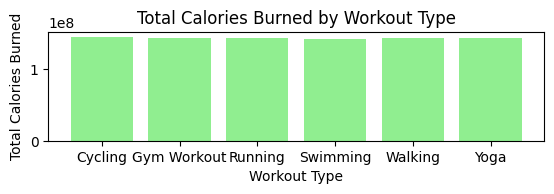

In [30]:
plt.subplot(3, 1, 2)
plt.bar(workout_summary['workout_type'], workout_summary['calories_burned'], color='lightgreen')
plt.title('Total Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Calories Burned')

Text(0, 0.5, 'Total Distance (km)')

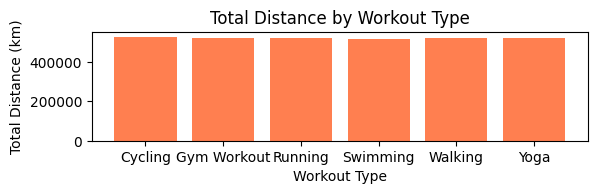

In [31]:
plt.subplot(3, 1, 3)
plt.bar(workout_summary['workout_type'], workout_summary['distance_km'], color='coral')
plt.title('Total Distance by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Distance (km)')

## Mood And Workout Type Correlation

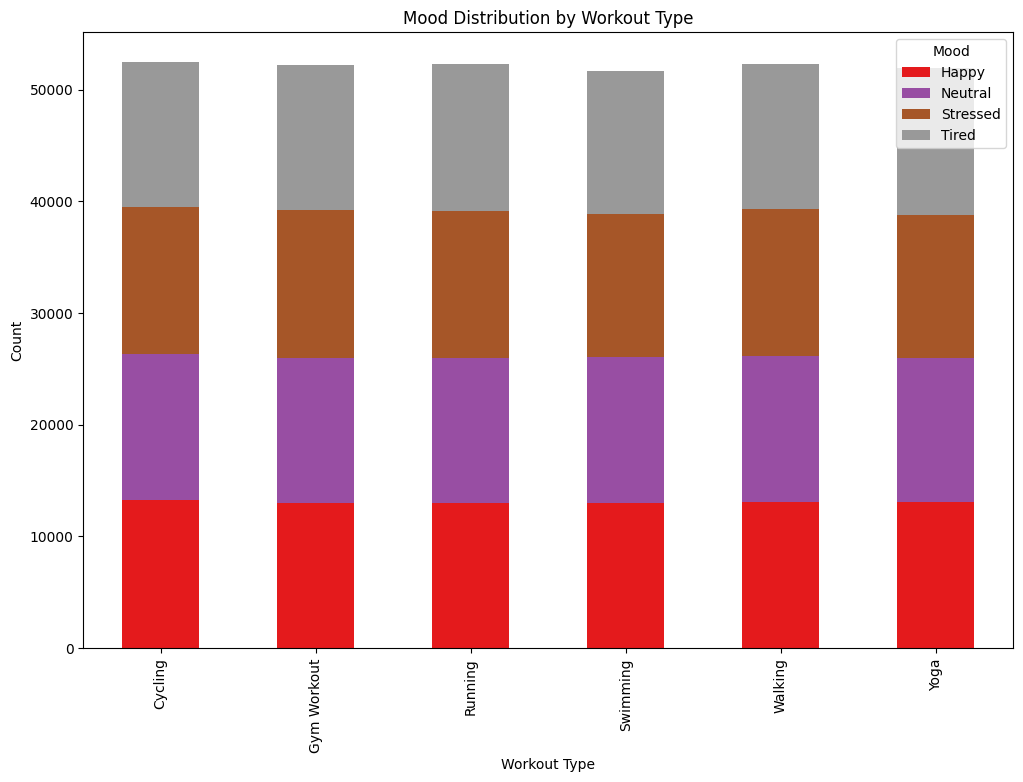

In [32]:
# Count occurrences of each mood for each workout type
mood_workout_counts = df.groupby(['workout_type', 'mood']).size().unstack()

# Plot
mood_workout_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Mood Distribution by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.show()


## Weather Condition and Workout Types

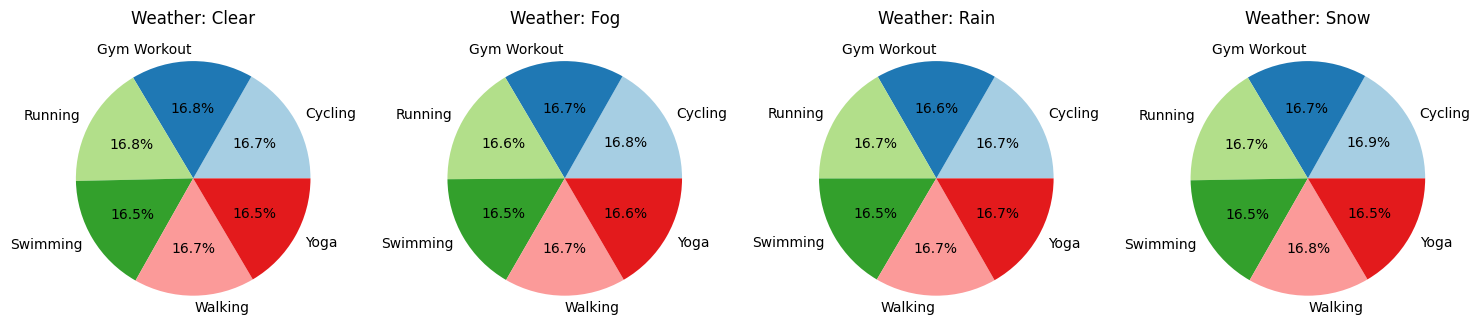

In [33]:
weather_workout_counts = df.groupby(['weather_conditions', 'workout_type']).size().unstack()

# Create subplots for each weather condition
weather_conditions = weather_workout_counts.index
num_conditions = len(weather_conditions)
fig, axes = plt.subplots(1, num_conditions, figsize=(15, 5), sharey=True)

# Plot pie charts
for ax, weather_condition in zip(axes, weather_conditions):
    sizes = weather_workout_counts.loc[weather_condition]
    ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(sizes.index))))
    ax.set_title(f'Weather: {weather_condition}')

plt.tight_layout()
plt.show()

## Workout Metrics vs Moods

<Figure size 1200x800 with 0 Axes>

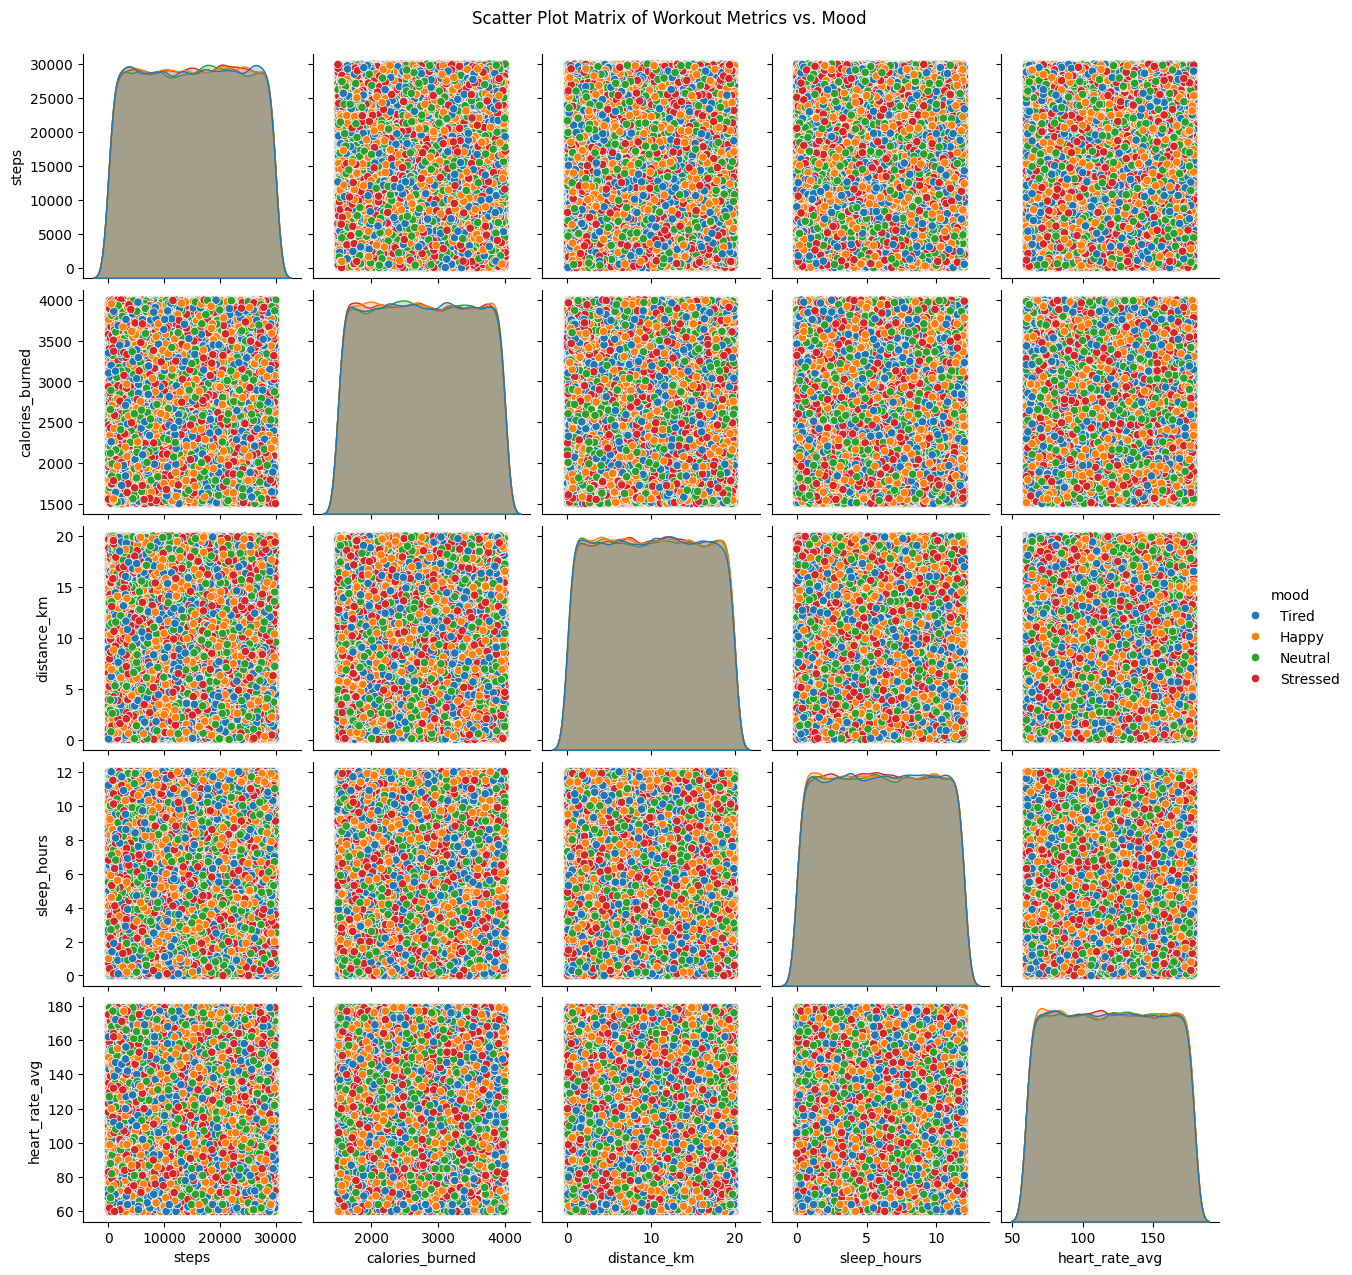

In [34]:
# Convert mood to categorical codes
df['mood_code'] = pd.Categorical(df['mood']).codes

# Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='mood', vars=['steps', 'calories_burned', 'distance_km', 'sleep_hours', 'heart_rate_avg'])
plt.suptitle('Scatter Plot Matrix of Workout Metrics vs. Mood', y=1.02)
plt.show()


## Sleep Hour Distribution

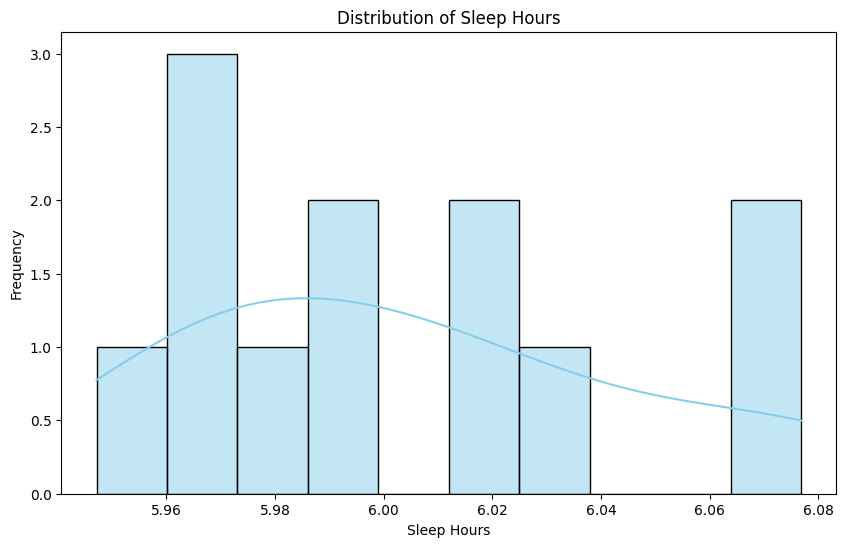

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

**Sleep Hour and Workout Metrics**

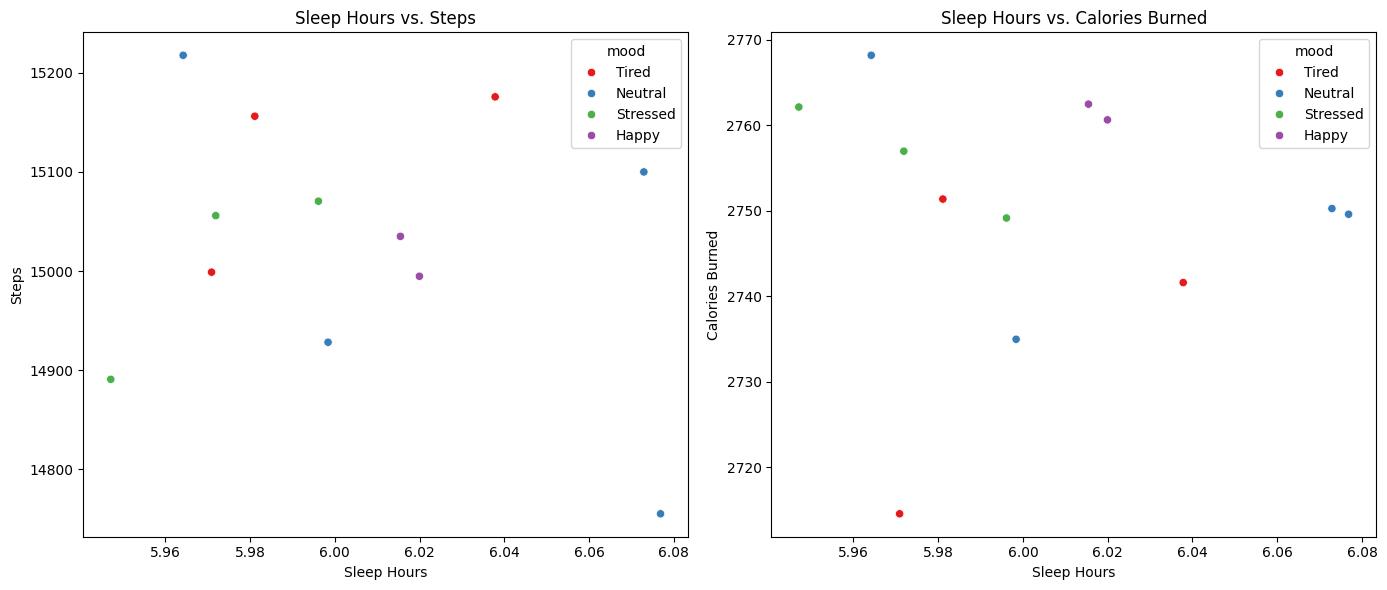

In [41]:
plt.figure(figsize=(14, 6))

# Scatter plot of Sleep Hours vs. Steps
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sleep_hours', y='steps', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Steps')
plt.xlabel('Sleep Hours')
plt.ylabel('Steps')

# Scatter plot of Sleep Hours vs. Calories Burned
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sleep_hours', y='calories_burned', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Calories Burned')
plt.xlabel('Sleep Hours')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()


**Sleep Hour And Mood**

C:\Users\santa\AppData\Local\Temp\ipykernel_21184\720433237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')


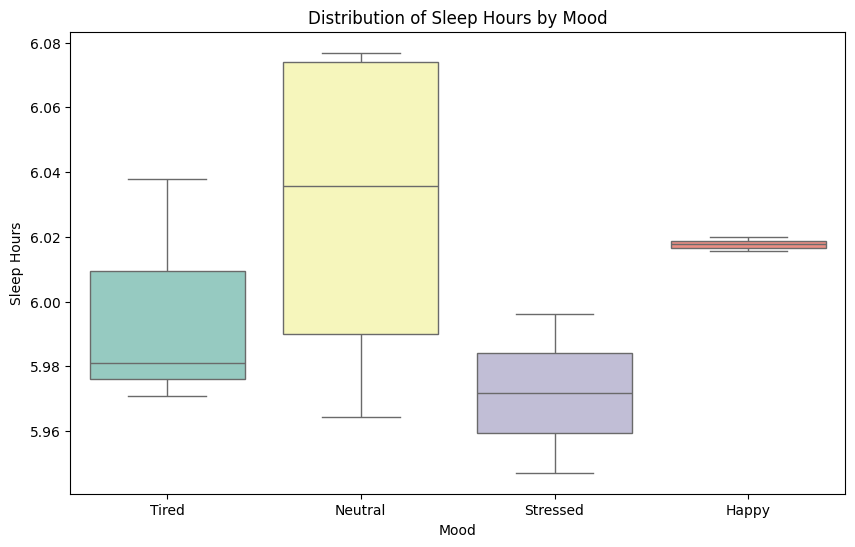

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')
plt.title('Distribution of Sleep Hours by Mood')
plt.xlabel('Mood')
plt.ylabel('Sleep Hours')
plt.show()


**Sleep Hours Over Time**

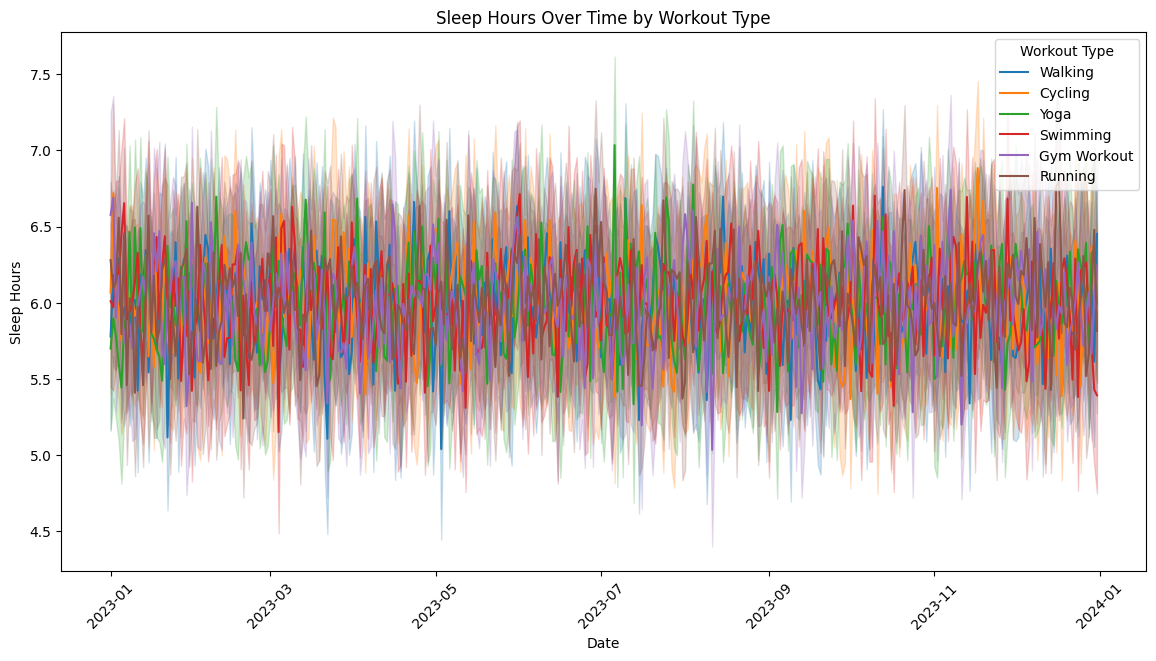

In [35]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='sleep_hours', hue='workout_type', palette='tab10')
plt.title('Sleep Hours Over Time by Workout Type')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)
plt.legend(title='Workout Type')
plt.show()


# Storing Into CSV Format

In [39]:
dfs = {
    'walking': grouped_walking_df,
    'cycling': grouped_cycling_df,
    'yoga': grouped_yoga_df,
    'gym': grouped_gym_workout_df,
    'swimming': grouped_swimming_df,
    'running': grouped_running_df
}

directory = '../Data/Processed/2023/'

# Save each DataFrame to a CSV file
for name, df in dfs.items():
    file_path = os.path.join(directory, f'{name}.csv')
    df.to_csv(file_path, index=False)
    print(f"DataFrame '{name}' has been saved to {file_path}")

DataFrame 'walking' has been saved to ../Data/Processed/2023/walking.csv
DataFrame 'cycling' has been saved to ../Data/Processed/2023/cycling.csv
DataFrame 'yoga' has been saved to ../Data/Processed/2023/yoga.csv
DataFrame 'gym' has been saved to ../Data/Processed/2023/gym.csv
DataFrame 'swimming' has been saved to ../Data/Processed/2023/swimming.csv
DataFrame 'running' has been saved to ../Data/Processed/2023/running.csv
